<a href="https://colab.research.google.com/github/jnsbrdbr/andrew-ng/blob/master/test10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from decimal import Decimal
from math import*
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/test/test10.csv"
data = pd.read_csv(path)

In [4]:
type(data)

pandas.core.frame.DataFrame

part 1

In [5]:
data

,src,dst
0,1,2
1,1,4
2,3,4
3,3,5
4,5,6
5,5,10
6,5,12
7,5,14


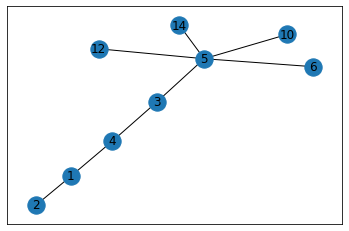

In [6]:
import networkx as nx
g = nx.from_pandas_edgelist(data, "src","dst")
nx.draw_networkx(g)

data must be in order

In [7]:
#adjucency matrix without chunking
adjc = pd.crosstab(data.src, data.dst)
idx = adjc.columns.union(adjc.index)
up_adj_mtx = adjc.reindex(index = idx, columns=idx, fill_value=0)


In [8]:
print(up_adj_mtx)

    1   2   3   4   5   6   10  12  14
1    0   1   0   1   0   0   0   0   0
2    0   0   0   0   0   0   0   0   0
3    0   0   0   1   1   0   0   0   0
4    0   0   0   0   0   0   0   0   0
5    0   0   0   0   0   1   1   1   1
6    0   0   0   0   0   0   0   0   0
10   0   0   0   0   0   0   0   0   0
12   0   0   0   0   0   0   0   0   0
14   0   0   0   0   0   0   0   0   0


In [9]:
adj_mtx=up_adj_mtx
for i in adj_mtx:
  for j in adj_mtx:
    if(adj_mtx[i][j]!=0):
       adj_mtx[j][i]=adj_mtx[i][j]

In [10]:
adj_mtx=adj_mtx.to_numpy()
print(adj_mtx)

[[0 1 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 1 1 1 1]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]]


In [11]:
#adjucency matrix with chunking

#for data in pd.read_csv(path, chunksize=2):
#    print (data)
#    data1 = pd.crosstab(data.src, data.dst)
#    idx = data1.columns.union(data1.index)
#    data2 = data1.reindex(index = idx, columns=idx, fill_value=0)
#    print(data2)

part2

common firend(CF):one of the measure for similarity in social networks is the number of firends,shared.given the sicial network G and two nodes u and v all vertics that are on a path wih the length of two between these two nodes are common firends of the nodes.
در مربع ماتریس مجاورت درایه"آی جی ام"و غیر واقع بر قطر اصلی مربع ماتریس مجاورت نشان دهنده تعدا مسیر به طول دو بین دو راس آی و جی هست

In [12]:
#common firend

CF=np.dot(adj_mtx,adj_mtx) #matrix multiplication
#print(CF,'\n')

CF=CF - np.diag(np.diag(CF))#matrix off_diagonal
print(CF)

[[0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 1]
 [0 1 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 1 1]
 [0 0 1 0 0 1 0 1 1]
 [0 0 1 0 0 1 1 0 1]
 [0 0 1 0 0 1 1 1 0]]


In [13]:
#total_firend

adjc = pd.crosstab(data.src, data.dst)
idx = adjc.columns.union(adjc.index)
up_adj_mtx = adjc.reindex(index = idx, columns=idx, fill_value=0)
up_adj_mtx=up_adj_mtx.to_numpy()
#print(up_adj_mtx)

In [14]:
i=up_adj_mtx.shape[0]
c=np.zeros(shape=(i,i))
for i in range(0,up_adj_mtx.shape[0]):
  for j in range(0,up_adj_mtx.shape[1]):
     if i==j:
       c[i,j]=(sum(up_adj_mtx[i,:])+sum(up_adj_mtx[:,j]))
#print(c)

In [15]:
i=c.shape[0]
TF=np.zeros(shape=(i,i))
for i in range(0,c.shape[0]):
  for j in range(0,c.shape[1]):
    TF[i,j]=c[i,i]+c[j,j]
TF=TF - np.diag(np.diag(TF))#matrix off_diagonal
print(TF)

[[0. 3. 4. 4. 7. 3. 3. 3. 3.]
 [3. 0. 3. 3. 6. 2. 2. 2. 2.]
 [4. 3. 0. 4. 7. 3. 3. 3. 3.]
 [4. 3. 4. 0. 7. 3. 3. 3. 3.]
 [7. 6. 7. 7. 0. 6. 6. 6. 6.]
 [3. 2. 3. 3. 6. 0. 2. 2. 2.]
 [3. 2. 3. 3. 6. 2. 0. 2. 2.]
 [3. 2. 3. 3. 6. 2. 2. 0. 2.]
 [3. 2. 3. 3. 6. 2. 2. 2. 0.]]


In [16]:
#jaccard_similarity

i=adj_mtx.shape[0]
jaccard_similarity=np.zeros(shape=(i,i))
for i in range(0,jaccard_similarity.shape[0]):
  for j in range(0,jaccard_similarity.shape[1]):
    if CF[i,j]==0 or TF[i,j]==0:
       jaccard_similarity[i,j]==0
    else:
       #jaccard_similarity[i,j]=(CF[i,j]/TF[i,j])
       jaccard_similarity[i,j]=np.divide(CF[i,j],TF[i,j])
       jaccard_similarity=np.round(jaccard_similarity,2)

jaccard_similarity=jaccard_similarity - np.diag(np.diag(jaccard_similarity))#matrix off_diagonal
print(jaccard_similarity)


[[0.   0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.33 0.   0.   0.   0.   0.  ]
 [0.25 0.   0.   0.   0.   0.33 0.33 0.33 0.33]
 [0.   0.33 0.   0.   0.14 0.   0.   0.   0.  ]
 [0.   0.   0.   0.14 0.   0.   0.   0.   0.  ]
 [0.   0.   0.33 0.   0.   0.   0.5  0.5  0.5 ]
 [0.   0.   0.33 0.   0.   0.5  0.   0.5  0.5 ]
 [0.   0.   0.33 0.   0.   0.5  0.5  0.   0.5 ]
 [0.   0.   0.33 0.   0.   0.5  0.5  0.5  0.  ]]


In [17]:
#cosine_similarity

i=up_adj_mtx.shape[0]
cosine_similarity1=np.zeros(shape=(i,i))
for i in range(0,cosine_similarity1.shape[0]):
  for j in range(0,cosine_similarity1.shape[1]):
       cosine_similarity1[i,j]=sqrt((c[i,i])*(c[j,j]))

#print(cosine_similarity1)

In [25]:
i=adj_mtx.shape[0]
cosine_similarity=np.zeros(shape=(i,i))
for i in range(0,cosine_similarity.shape[0]):
  for j in range(0,cosine_similarity.shape[1]):
    if CF[i,j]==0 or cosine_similarity1[i,j]==0:
       cosine_similarity[i,j]==0
    else:
       #jaccard_similarity[i,j]=(CF[i,j]/TF[i,j])
       cosine_similarity[i,j]=np.divide(CF[i,j],cosine_similarity1[i,j])
       cosine_similarity=np.round(cosine_similarity,2)

cosine_similarity=cosine_similarity - np.diag(np.diag(cosine_similarity))#matrix off_diagonal
print(cosine_similarity)

[[0.   0.   0.5  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.71 0.   0.   0.   0.   0.  ]
 [0.5  0.   0.   0.   0.   0.71 0.71 0.71 0.71]
 [0.   0.71 0.   0.   0.32 0.   0.   0.   0.  ]
 [0.   0.   0.   0.32 0.   0.   0.   0.   0.  ]
 [0.   0.   0.71 0.   0.   0.   1.   1.   1.  ]
 [0.   0.   0.71 0.   0.   1.   0.   1.   1.  ]
 [0.   0.   0.71 0.   0.   1.   1.   0.   1.  ]
 [0.   0.   0.71 0.   0.   1.   1.   1.   0.  ]]


In [26]:
#L1_norm()
 
i=up_adj_mtx.shape[0]
L1_norm1=np.zeros(shape=(i,i))
for i in range(0,L1_norm1.shape[0]):
  for j in range(0,L1_norm1.shape[1]):
       L1_norm1[i,j]=(c[i,i])*(c[j,j])

#print(L1_norm1)

In [27]:
i=adj_mtx.shape[0]
L1_norm=np.zeros(shape=(i,i))
for i in range(0,L1_norm.shape[0]):
  for j in range(0,L1_norm.shape[1]):
    if CF[i,j]==0 or L1_norm1[i,j]==0:
       L1_norm[i,j]==0
    else:
       #jaccard_similarity[i,j]=(CF[i,j]/TF[i,j])
       L1_norm[i,j]=np.divide(CF[i,j],L1_norm1[i,j])
       L1_norm=np.round(L1_norm,2)

L1_norm=L1_norm - np.diag(np.diag(L1_norm))#matrix off_diagonal
print(L1_norm)

[[0.   0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.5  0.   0.   0.   0.   0.  ]
 [0.25 0.   0.   0.   0.   0.5  0.5  0.5  0.5 ]
 [0.   0.5  0.   0.   0.1  0.   0.   0.   0.  ]
 [0.   0.   0.   0.1  0.   0.   0.   0.   0.  ]
 [0.   0.   0.5  0.   0.   0.   1.   1.   1.  ]
 [0.   0.   0.5  0.   0.   1.   0.   1.   1.  ]
 [0.   0.   0.5  0.   0.   1.   1.   0.   1.  ]
 [0.   0.   0.5  0.   0.   1.   1.   1.   0.  ]]


In [31]:
#edge_weight_measure

i=up_adj_mtx.shape[0]
ewm=np.zeros(shape=(i,i))
for i in range(0,ewm.shape[0]):
  for j in range(0,ewm.shape[1]):
     if i==j:
       ewm[i,j]=1/sqrt(1+c[i,i])
       ewm=np.round(ewm)

#print(ewm)

In [32]:
i=up_adj_mtx.shape[0]
wsum=np.zeros(shape=(i,i))
for i in range(0,wsum.shape[0]):
  for j in range(0,wsum.shape[1]):
    wsum[i,j]=ewm[i,i]+ewm[j,j]
    #wsum=np.round(wsum)
print(wsum)

[[2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]]


In [33]:
i=up_adj_mtx.shape[0]
wmul=np.zeros(shape=(i,i))
for i in range(0,wmul.shape[0]):
  for j in range(0,wmul.shape[1]):
    wmul[i,j]=ewm[i,i]*ewm[j,j]
    wmul=np.round(wmul,2)
print(wmul)

[[1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]]
